# **Importar librerias**

In [1]:
#!pip install scipy==1.4.0

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from scipy.optimize import differentialevolution
from scipy import optimize

%matplotlib inline

# **Base de datos a utilizar**

In [2]:
url = 'https://raw.githubusercontent.com/tanlitung/Datasets/master/kc_house_data.csv'
df = pd.read_csv(url)

In [3]:
print(df.head(20))

            id             date      price  bedrooms  bathrooms  sqft_living  \
0   7129300520  20141013T000000   221900.0         3       1.00         1180   
1   6414100192  20141209T000000   538000.0         3       2.25         2570   
2   5631500400  20150225T000000   180000.0         2       1.00          770   
3   2487200875  20141209T000000   604000.0         4       3.00         1960   
4   1954400510  20150218T000000   510000.0         3       2.00         1680   
5   7237550310  20140512T000000  1230000.0         4       4.50         5420   
6   1321400060  20140627T000000   257500.0         3       2.25         1715   
7   2008000270  20150115T000000   291850.0         3       1.50         1060   
8   2414600126  20150415T000000   229500.0         3       1.00         1780   
9   3793500160  20150312T000000   323000.0         3       2.50         1890   
10  1736800520  20150403T000000   662500.0         3       2.50         3560   
11  9212900260  20140527T000000   468000

In [29]:
print(df.info())
#print(len((df["waterfront"] == 1) == True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [30]:
print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.401822e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.673622e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

# **Analisis de las variables y salida y tratamiento de datos**

## **Descripcion de las variables**



*   id: ID of the house
*   date: Data of house sold
*   bedrooms: Number of bedrooms
*   bathroooms: Number of bathrooms
*   sqft_living: Square footage of house
*   sqft_lot: Square footage of lot
*   floors: Number of floors/ Level
*   waterfront: 1 = Waterfront view; 0 = No waterfront view
*   view: 1 = House been viewed; 0 = House has not been viewed
*   condition: 1 indicates worn out property and 5 excellent
*   grade: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent
*   sqft_above: Square footage of house apart from basement
*   sqft_basement: Square footage of the basement
*   yr_built: Year of house built
*   yr_renovated: Year of house renovated
*   zipcode: Zip code
*   lat: Latitude coordination
*   long: Longitude coordination
*   sqft_living15: Square footage of house in 2015 (implies-- some renovations)
*   sqft_lot15: Square footage of lot in 2015 (implies-- some renovations)

## **Se eliminan datos que no son relevantes**

In [4]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)

In [5]:
df.drop('sqft_lot', axis = 1, inplace = True)
df.drop('condition', axis = 1, inplace = True)
df.drop('grade', axis = 1, inplace = True)
df.drop('sqft_basement', axis = 1, inplace = True)
df.drop('sqft_above', axis = 1, inplace = True)
df.drop('yr_built', axis = 1, inplace = True)
df.drop('yr_renovated', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)
df.drop('sqft_living15', axis = 1, inplace = True)
df.drop('sqft_lot15', axis = 1, inplace = True)
df.drop('view', axis = 1, inplace = True)
#df.drop('waterfront', axis = 1, inplace = True)
#df.drop('zipcode', axis = 1, inplace = True)

## **Analisis de valores faltantes**

<Axes: >

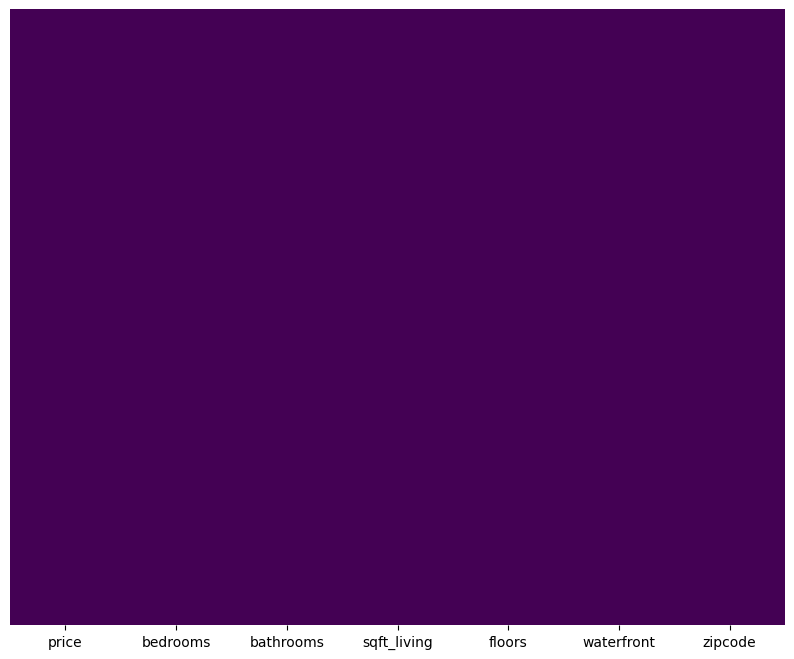

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [34]:
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
waterfront     0
zipcode        0
dtype: int64

## **Normalizar datos**

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
col_name = df.drop('price', axis = 1).columns[:]
x = df.loc[:, col_name]
y = df['price']

x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = col_name)

print(df.head())
x.head()

      price  bedrooms  bathrooms  sqft_living  floors  waterfront  zipcode
0  221900.0         3       1.00         1180     1.0           0    98178
1  538000.0         3       2.25         2570     2.0           0    98125
2  180000.0         2       1.00          770     1.0           0    98028
3  604000.0         4       3.00         1960     1.0           0    98136
4  510000.0         3       2.00         1680     1.0           0    98074


,bedrooms,bathrooms,sqft_living,floors,waterfront,zipcode
0,0.090909,0.12500,0.067170,0.0,0.0,0.893939
1,0.090909,0.28125,0.172075,0.4,0.0,0.626263
2,0.060606,0.12500,0.036226,0.0,0.0,0.136364
3,0.121212,0.37500,0.126038,0.0,0.0,0.681818
4,0.090909,0.25000,0.104906,0.0,0.0,0.368687


## **Visualizar la correlación de los datos**

<Axes: >

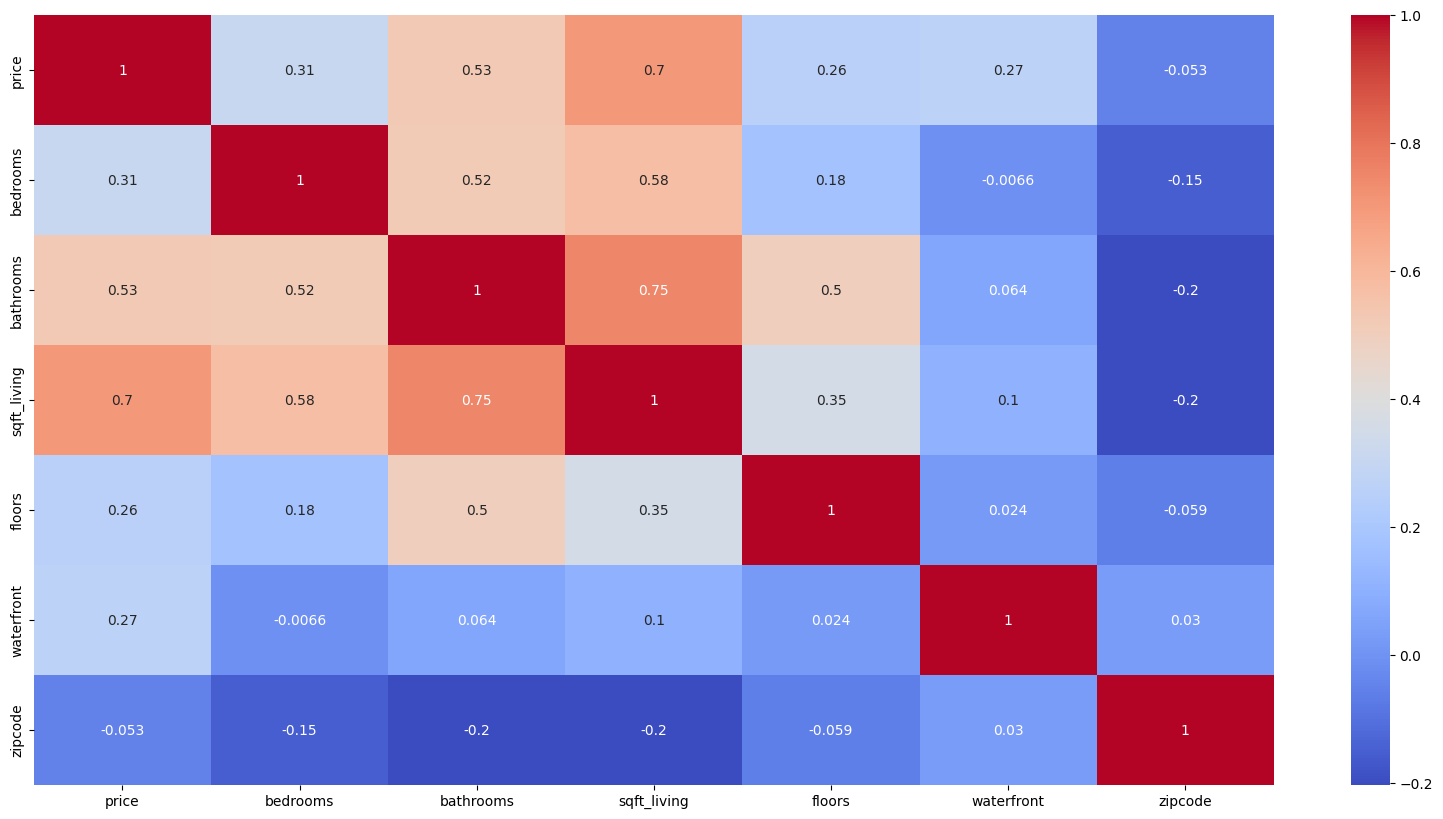

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## **Relación de las entradas con la salida**

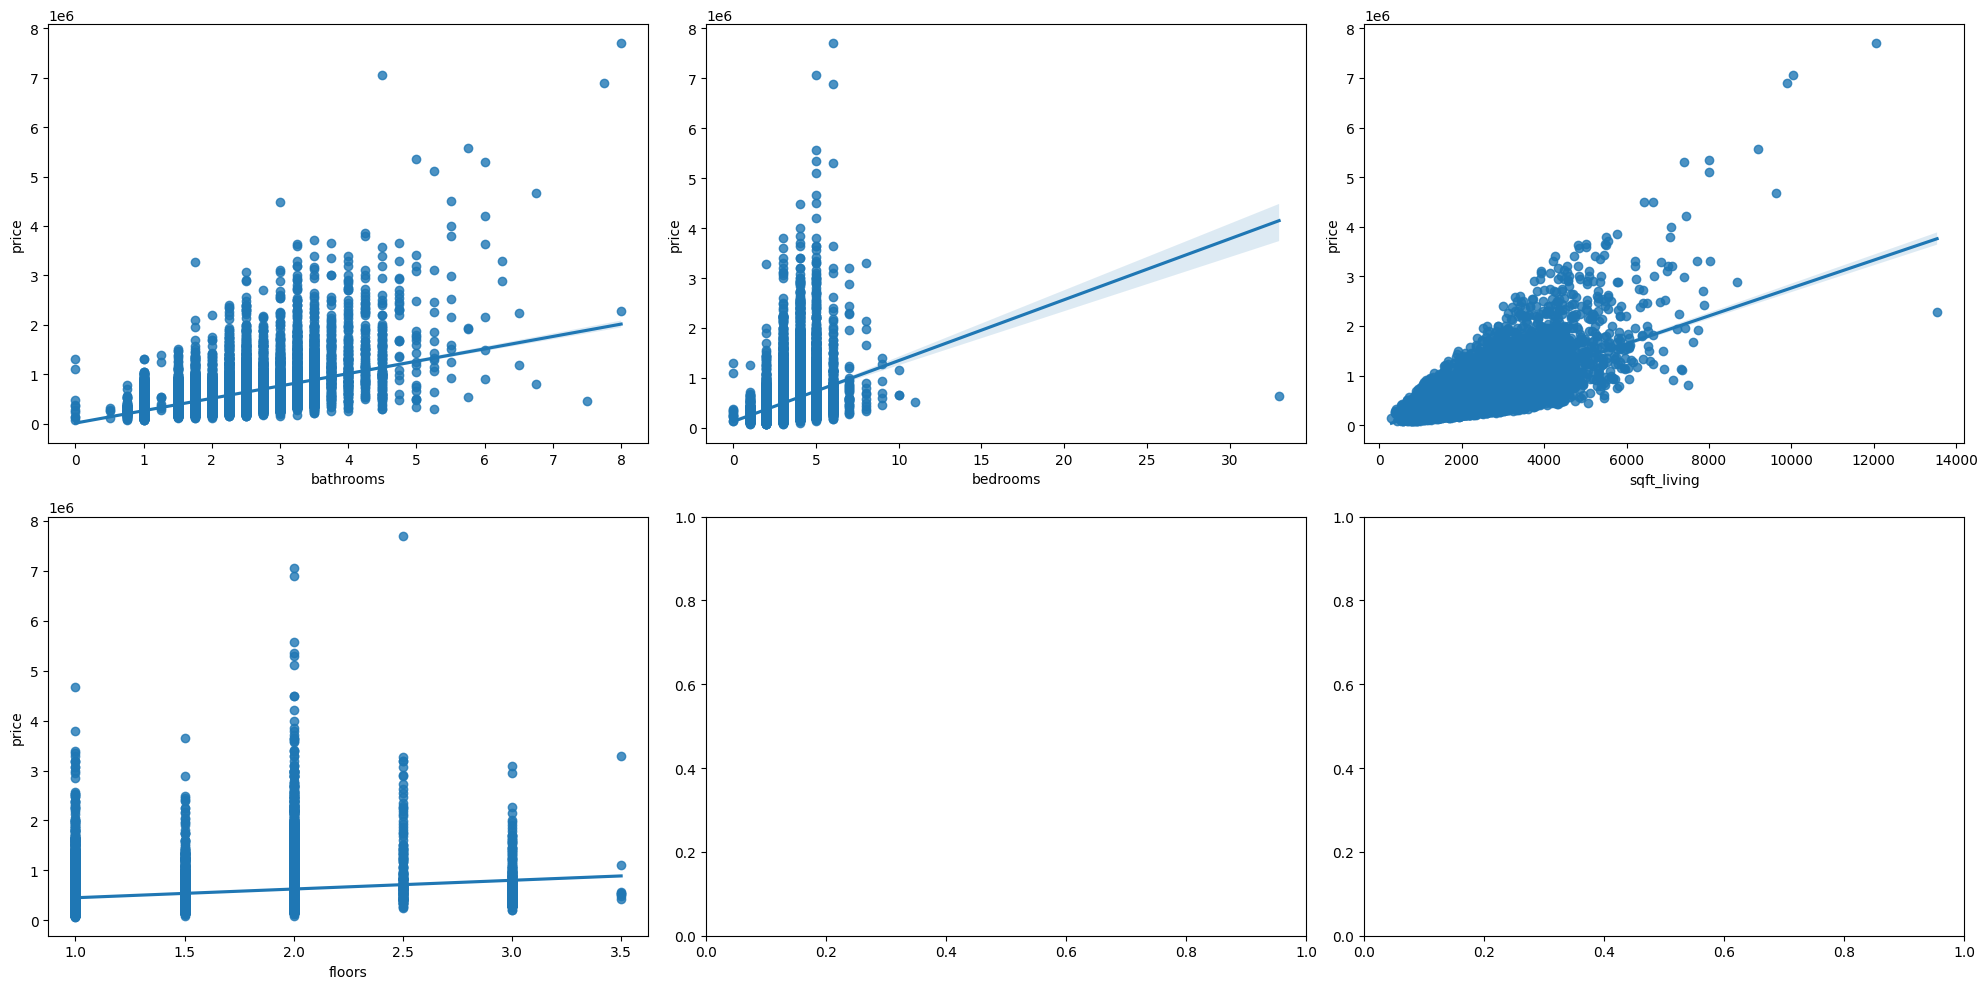

In [37]:
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize = (20, 10))
sns.regplot(y = df['price'], x = df['bathrooms'], ax = axs[0, 0])
sns.regplot(y = df['price'], x = df['bedrooms'], ax = axs[0, 1])
sns.regplot(y = df['price'], x = df['sqft_living'], ax = axs[0, 2])
sns.regplot(y = df['price'], x = df['floors'], ax = axs[1, 0])
# sns.regplot(y = df['price'], x = df['waterfront'], ax = axs[1, 1])
#sns.regplot(y = df['price'], x = df['zipcode'], ax = axs[1, 1])
plt.tight_layout()

In [38]:
#data = pd.concat([y, x['bedrooms']], axis=1)
#data.plot().scatter(x='bedrooms', y='price')

## **Distribuciónes**

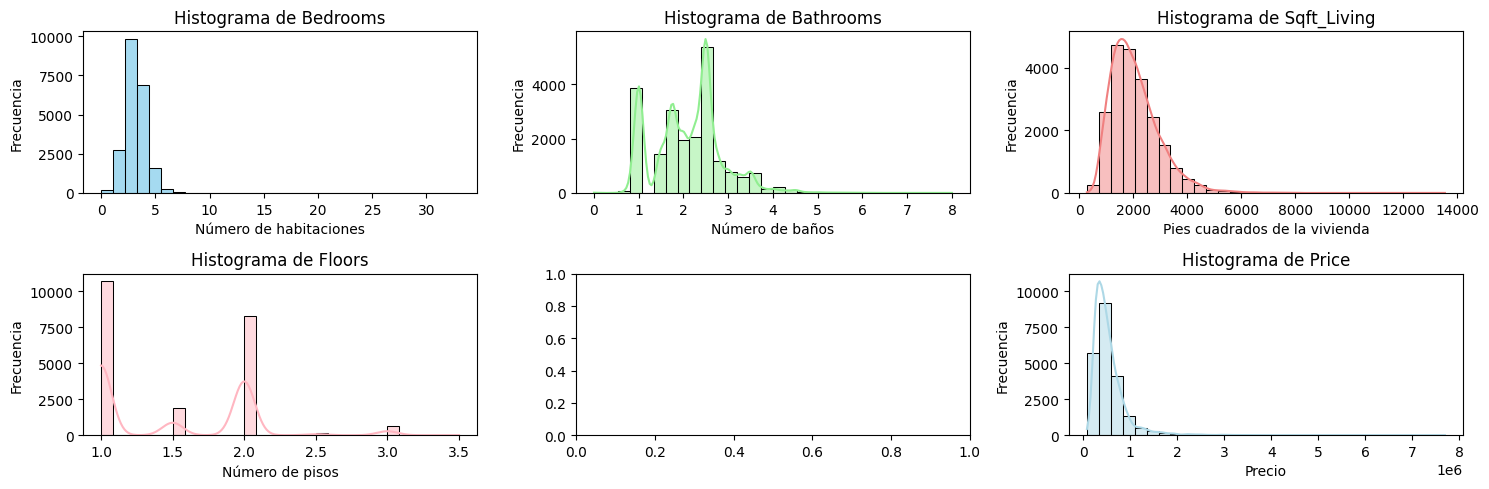

In [39]:
# Crear subplots para los histogramas de cada variable
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

# Graficar histograma de bedrooms
sns.histplot(df['bedrooms'].dropna(), ax=axes[0, 0], color='skyblue', kde=False, bins=30)
axes[0, 0].set_title('Histograma de Bedrooms')
axes[0, 0].set_xlabel('Número de habitaciones')
axes[0, 0].set_ylabel('Frecuencia')

# Graficar histograma de bathrooms
sns.histplot(df['bathrooms'].dropna(), ax=axes[0, 1], color='lightgreen', kde=True, bins=30)
axes[0, 1].set_title('Histograma de Bathrooms')
axes[0, 1].set_xlabel('Número de baños')
axes[0, 1].set_ylabel('Frecuencia')

# Graficar histograma de sqft_living
sns.histplot(df['sqft_living'].dropna(), ax=axes[0, 2], color='lightcoral', kde=True, bins=30)
axes[0, 2].set_title('Histograma de Sqft_Living')
axes[0, 2].set_xlabel('Pies cuadrados de la vivienda')
axes[0, 2].set_ylabel('Frecuencia')

# Graficar histograma de floors
sns.histplot(df['floors'].dropna(), ax=axes[1, 0], color='lightpink', kde=True, bins=30)
axes[1, 0].set_title('Histograma de Floors')
axes[1, 0].set_xlabel('Número de pisos')
axes[1, 0].set_ylabel('Frecuencia')

# Graficar histograma de waterfront
#sns.histplot(df['waterfront'].dropna(), ax=axes[1, 1], color='lightyellow', kde=True, bins=30)
#axes[1, 1].set_title('Histograma de Waterfront')
#axes[1, 1].set_xlabel('Vista al agua (1 = Sí, 0 = No)')
#axes[1, 1].set_ylabel('Frecuencia')

# Graficar histograma de zipcode
#sns.histplot(df['zipcode'].dropna(), ax=axes[1, 1], color='lightyellow', kde=True, bins=30)
#axes[1, 1].set_title('Histograma de Zipcode')
#axes[1, 1].set_xlabel('Código postal')
#axes[1, 1].set_ylabel('Frecuencia')

# Graficar histograma de price
sns.histplot(df['price'].dropna(), ax=axes[1, 2], color='lightblue', kde=True, bins=30)
axes[1, 2].set_title('Histograma de Price')
axes[1, 2].set_xlabel('Precio')
axes[1, 2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Distribución del precio**

<Axes: xlabel='price', ylabel='Count'>

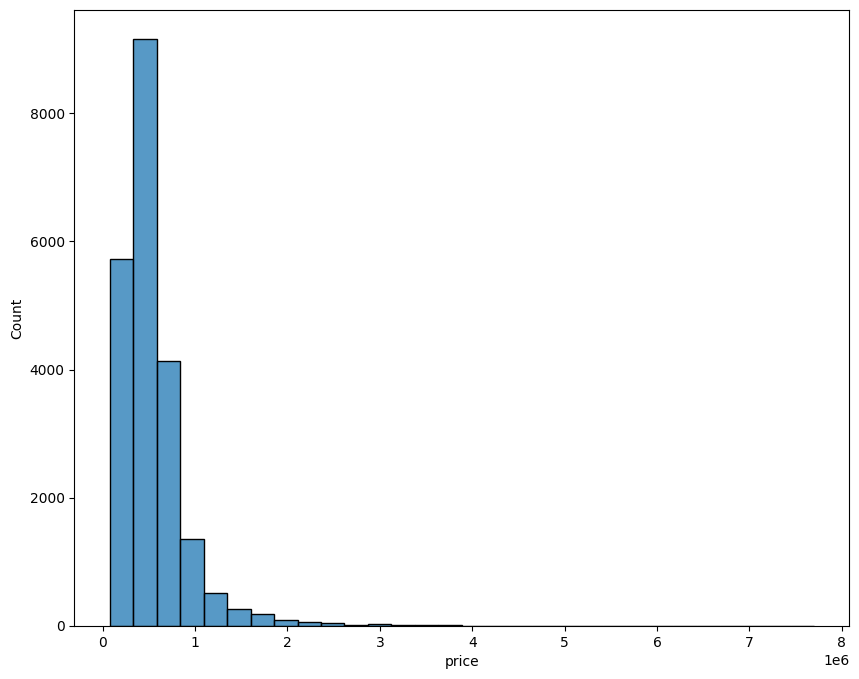

In [40]:
plt.figure(figsize=(10,8))
sns.histplot(y.dropna(), kde=False, bins=30)
# sns.displot(y.dropna())

**Distribución de cuartos**

<Axes: xlabel='bedrooms', ylabel='Count'>

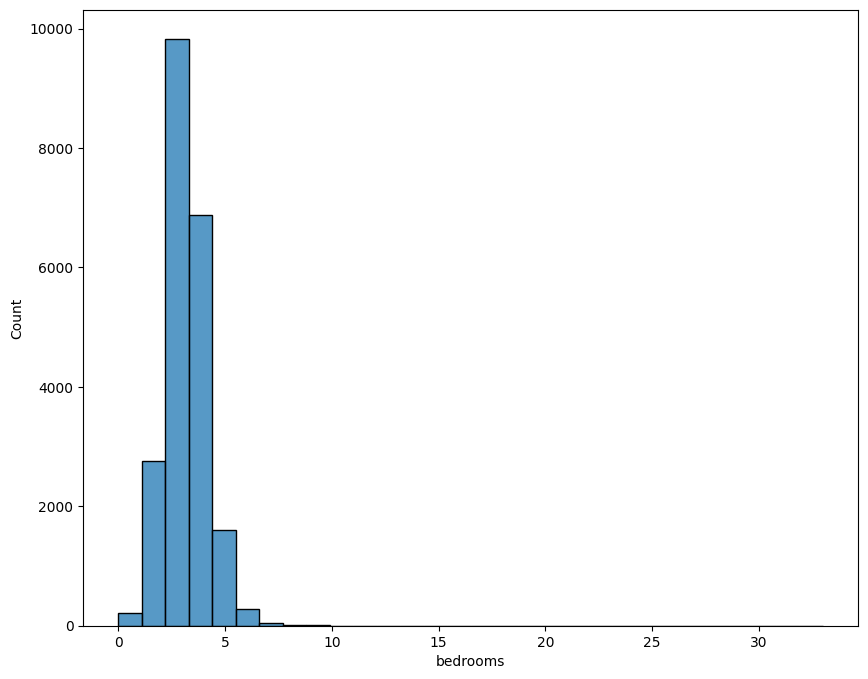

In [41]:
plt.figure(figsize=(10,8))
sns.histplot(df["bedrooms"].dropna(), kde=False, bins=30)

**Distribución de baños**

<Axes: xlabel='bathrooms', ylabel='Count'>

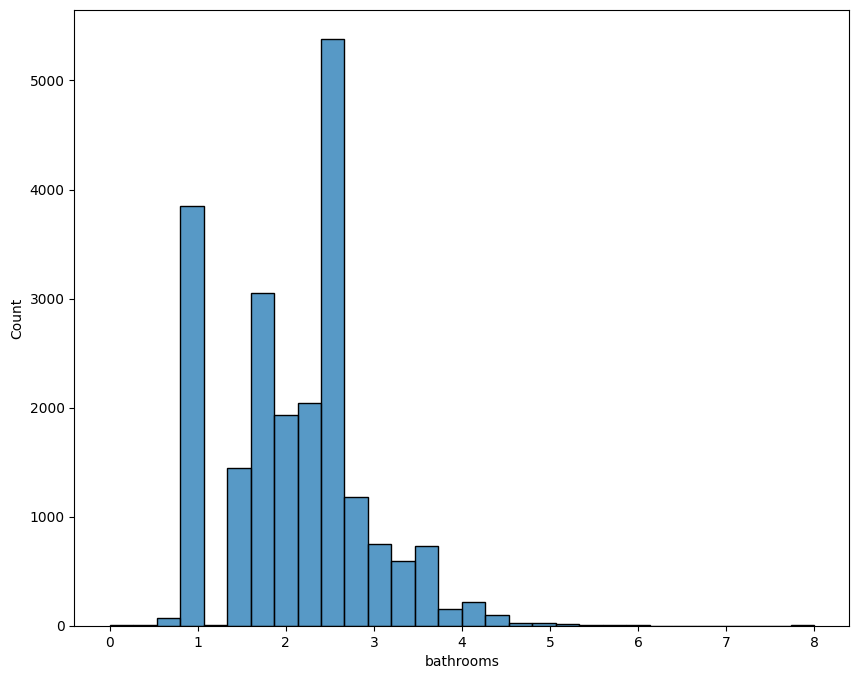

In [42]:
plt.figure(figsize=(10,8))
sns.histplot(df['bathrooms'].dropna(), kde=False, bins=30)

**Distribución de pisos**

<Axes: xlabel='floors', ylabel='Count'>

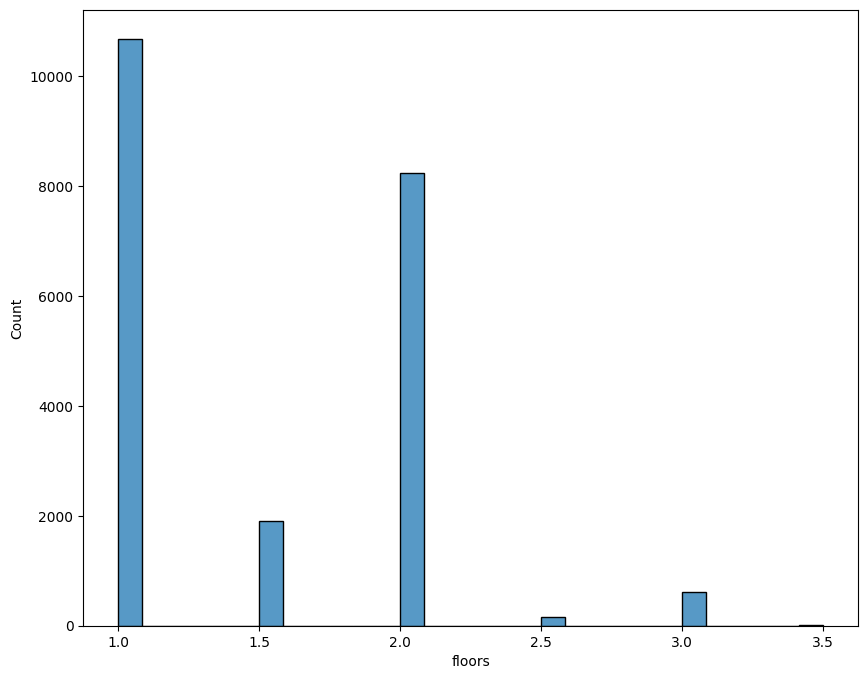

In [43]:
plt.figure(figsize=(10,8))
sns.histplot(df['floors'].dropna(), kde=False, bins=30)

**Distribución de areas**

<Axes: xlabel='sqft_living', ylabel='Count'>

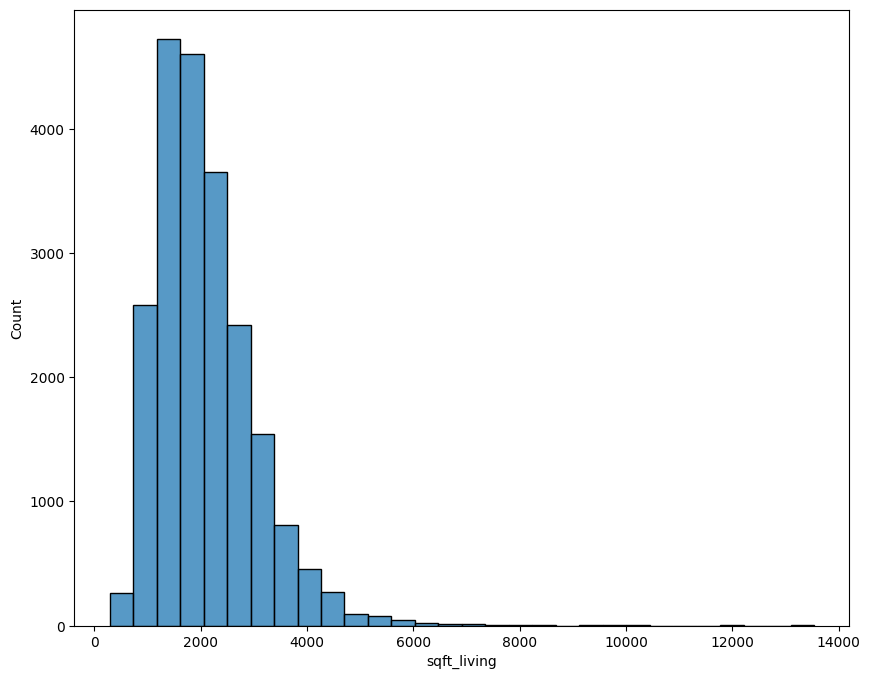

In [44]:
plt.figure(figsize=(10,8))
sns.histplot(df['sqft_living'].dropna(), kde=False, bins=30)

# **Aprendizaje supervisado**

**Dividir los datos en conjuntos de entrenamiento y prueba**

In [20]:
X = df.drop('price', axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#, random_state=5)
print("Train x shape : ", X_train.shape)
print("Train y shape : ", y_train.shape)
print("Test x shape : ", X_test.shape)
print("Test y shape : ", y_test.shape)

Train x shape :  (17290, 6)
Train y shape :  (17290,)
Test x shape :  (4323, 6)
Test y shape :  (4323,)


## **Consturcción del modelo**

### **Regresión lineal**

In [ ]:
modelLinear = LinearRegression()
modelLinear.fit(X_train, y_train)

LinearRegression()

### **Regresión de árbol de decisión**

In [ ]:
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)
tree_pred = tree_regressor.predict(X_test)

### **Regresión de bosques aleatorios**

In [ ]:
forest_regressor = RandomForestRegressor()
forest_regressor.fit(X_train, y_train)
forest_pred = forest_regressor.predict(X_test)

## **Interpretación del modelo**

### **Regresion lineal**

In [ ]:
print("Intercepción del Model: ", modelLinear.intercept_, "\n")
print("Coeficiente del Modelo: ", modelLinear.coef_, "\n")

for i in range(len(X.columns)):
  print(X.columns[i], ": ", modelLinear.coef_[i])

Intercepción del Model:  71390.86972750176 

Coeficiente del Modelo:  [-53016.21834809   1933.23825618    304.20563267   6262.00258194] 

bedrooms :  -53016.218348088674
bathrooms :  1933.2382561802353
sqft_living :  304.2056326734187
floors :  6262.002581942256


In [ ]:
y_pred = modelLinear.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

output = pd.DataFrame(y_test[0:10])
output['Predicted'] = y_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

           price      Predicted     Difference
19667  1450000.0  754906.447424 -695093.552576
19096   375000.0  505131.270804  130131.270804
17429   300000.0  791389.985153  491389.985153
18464   195000.0  283843.419196   88843.419196
2435    355000.0  698678.366659  343678.366659
7645    492000.0  262549.024909 -229450.975091
18272   968060.0  667439.852162 -300620.147838
16647   305000.0  506353.065787  201353.065787
9696    315000.0  348841.889084   33841.889084
16540   419625.0  691954.192704  272329.192704 

Model testing performance:
--------------------------
RMSE is 277178.33113884367
R2 score is 0.5148548756441622


In [ ]:
print("\nRegresión lineal:")
print('Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Regresión lineal:
Mean Squared Error: 277178.33113884367
Coefficient of determination: 0.51


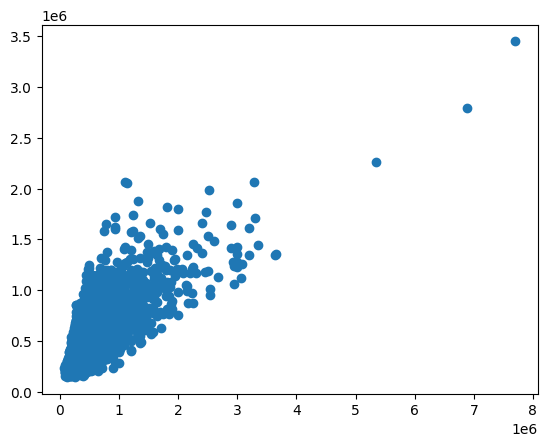

In [ ]:
plt.scatter(y_test, y_pred)

### **Regresión de árbol de decisión**

In [ ]:
print("\nRegresión de árbol de decisión:")
print('Mean Squared Error:', np.sqrt(mean_squared_error(y_test, tree_pred)))
print('Coefficient of determination: %.2f' % r2_score(y_test, tree_pred))


Regresión de árbol de decisión:
Mean Squared Error: 280638.8441602981
Coefficient of determination: 0.43


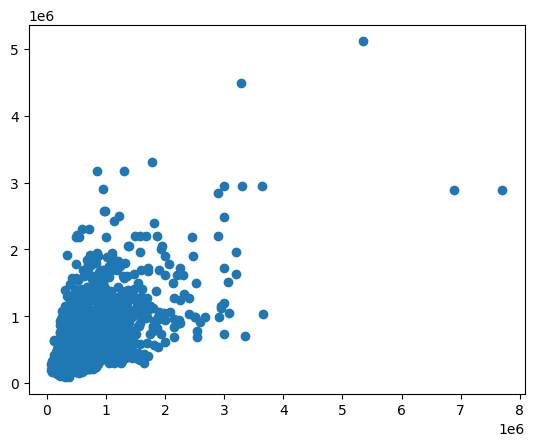

In [ ]:
plt.scatter(y_test, tree_pred)

### **Regresión de bosques aleatorios**

In [ ]:
print("\nRegresión de bosques aleatorios:")
print('Mean Squared Error:', np.sqrt(mean_squared_error(y_test, forest_pred)))
print('Coefficient of determination: %.2f' % r2_score(y_test, forest_pred))


Regresión de bosques aleatorios:
Mean Squared Error: 277955.15769164864
Coefficient of determination: 0.51


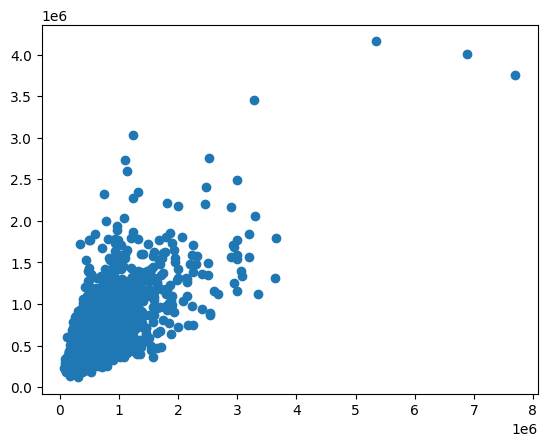

In [ ]:
plt.scatter(y_test, forest_pred)

# **Iteracion de los datos**

In [7]:
X = df.drop('price', axis = 1)
y = df['price']

## **Regresión lineal**

In [ ]:
# Se itera varias veces la regresión lineal y se almacenan los resultados
rmse_list_lineal = []
r2_list_lineal = []
y_pred_list_lineal = []
datosIteracion_lineal = {}
y_test_list_lineal = []

num_iterations = 1000  # Número de iteraciones a realizar
porcentajes = [0.2, 0.3, 0.5, 0.7, 0.8] # Porcentajes de datos de enteenamiento a iterar

# X = df.drop('price', axis=1)
# y = df['price']

for j in porcentajes:
  rmse_list_lineal = []
  r2_list_lineal = []
  y_pred_list_lineal = []
  y_test_list_lineal = []

  for i in range(num_iterations):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=j)

      modelLinear = LinearRegression()
      modelLinear.fit(X_train, y_train)

      y_pred = modelLinear.predict(X_test)
      rmse = np.sqrt(mean_squared_error(y_test, y_pred))
      r2 = r2_score(y_test, y_pred)

      rmse_list_lineal.append(rmse)
      r2_list_lineal.append(r2)
      y_pred_list_lineal.append(y_pred)
      y_test_list_lineal.append(y_test)

  datosIteracion_lineal[str(j)] = {'y_pred_list': y_pred_list_lineal, 'y_test_list': y_test_list_lineal, 'rmse_list': rmse_list_lineal, 'r2_list': r2_list_lineal}

In [ ]:
# Se muestran los resultados
for i in datosIteracion_lineal.keys():
  print("Porcentaje de datos de entrenamiento: " + i)
  # Se imprime la lista de resultados de RMSE y R2
  print("Lista de resultados de RMSE:", datosIteracion_lineal[i]["rmse_list"])
  print("Lista de resultados de R2:", datosIteracion_lineal[i]["r2_list"])

  # La media y la desviación estándar
  print("Media de RMSE:", np.mean(datosIteracion_lineal[i]["rmse_list"]))
  print("Desviación estándar de RMSE:", np.std(datosIteracion_lineal[i]["rmse_list"]))
  print("Media de R2:", np.mean(datosIteracion_lineal[i]["r2_list"]))
  print("Desviación estándar de R2:", np.std(datosIteracion_lineal[i]["r2_list"]))

  print("\n\n")

Porcentaje de datos de entrenamiento: 0.2
Lista de resultados de RMSE: [241168.68370452075, 245158.81217549255, 251940.82930453966, 248800.57045682883, 239660.50047886622, 259386.71708186463, 253483.8833481982, 233368.84438530754, 258781.86394521967, 261350.66596814984, 260106.30740632003, 267005.6873390597, 249079.89243107598, 249946.2433983195, 258509.2324387668, 256192.02443316937, 263986.2334132335, 256489.47026848016, 267522.51275231346, 252305.06125099753, 261945.05408832073, 248953.16700398774, 247231.63222403964, 252256.8981431173, 270435.51446211676, 249924.29337418804, 263796.1010447215, 249611.59232193814, 262429.24462377274, 253231.407180961, 246432.8007059361, 256272.81365979623, 259563.31125696786, 259685.38882886333, 249762.51150774673, 253782.84325397832, 256797.73959717448, 264378.61593580834, 250527.9001552794, 259150.51427985556, 256525.47265334518, 257545.77233935456, 248776.72771605657, 273471.8260462923, 253180.89475044186, 243660.63032519247, 254100.54883850957, 

## **Regresión arbol de decision**

In [ ]:
# Se itera varias veces la regresión lineal y se almacenan los resultados
rmse_lis_arbol = []
r2_list_arbol = []
y_pred_list_arbol = []
datosIteracion_arbol = {}
y_test_list_arbol = []

num_iterations = 1000  # Número de iteraciones a realizar
porcentajes = [0.2, 0.3, 0.5, 0.7, 0.8] # Porcentajes de datos de enteenamiento a iterar

# X = df.drop('price', axis=1)
# y = df['price']

for j in porcentajes:
  rmse_list_arbol = []
  r2_list_arbol = []
  y_pred_list_arbol = []
  y_test_list_arbol = []

  for i in range(num_iterations):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=j)

      tree_regressor = DecisionTreeRegressor()
      tree_regressor.fit(X_train, y_train)
      tree_pred = tree_regressor.predict(X_test)

      rmse = np.sqrt(mean_squared_error(y_test, tree_pred))
      r2 = r2_score(y_test, tree_pred)

      rmse_list_arbol.append(rmse)
      r2_list_arbol.append(r2)
      y_pred_list_arbol.append(tree_pred)
      y_test_list_arbol.append(y_test)

  datosIteracion_arbol[str(j)] = {'y_pred_list': y_pred_list_arbol, 'y_test_list': y_test_list_arbol, 'rmse_list': rmse_list_arbol, 'r2_list': r2_list_arbol}

In [ ]:
# Se muestran los resultados
for i in datosIteracion_arbol.keys():
  print("Porcentaje de datos de entrenamiento: " + i)
  # Se imprime la lista de resultados de RMSE y R2
  print("Lista de resultados de RMSE:", datosIteracion_arbol[i]["rmse_list"])
  print("Lista de resultados de R2:", datosIteracion_arbol[i]["r2_list"])

  # La media y la desviación estándar
  print("Media de RMSE:", np.mean(datosIteracion_arbol[i]["rmse_list"]))
  print("Desviación estándar de RMSE:", np.std(datosIteracion_arbol[i]["rmse_list"]))
  print("Media de R2:", np.mean(datosIteracion_arbol[i]["r2_list"]))
  print("Desviación estándar de R2:", np.std(datosIteracion_arbol[i]["r2_list"]))

  print("\n\n")

Porcentaje de datos de entrenamiento: 0.2
Lista de resultados de RMSE: [256331.23430515092, 229585.12661858485, 247840.95561503348, 232998.40275422053, 244229.3257207881, 246518.03108282408, 247111.4472559803, 223777.23999901314, 235889.883678079, 249410.49156647726, 251478.61580957423, 245837.6779760793, 262264.46285267855, 256909.29927852913, 248907.22506201753, 251947.5505978142, 236014.6566506233, 248789.9361865929, 231587.15561510957, 234512.19202826073, 260156.7495547393, 244190.46332276292, 263519.5582618528, 260887.40237373905, 235460.39648128249, 230963.7135894086, 259998.23589234505, 229677.8387929771, 246434.4275016573, 237492.71454734053, 257515.87989434676, 267122.52833408385, 251433.33669602248, 255136.60876852548, 251685.6590256222, 249455.58298987176, 249772.8328000793, 233275.5724284794, 253097.26773022953, 237803.21257161535, 246564.23403316733, 245138.76300222115, 259514.81994467118, 249211.0162137356, 239814.12831909242, 246666.16257276334, 262320.67860079976, 22848

## **Regresión de bosques aleatorios**

In [ ]:
# Se itera varias veces la regresión lineal y se almacenan los resultados
rmse_list_bosque = []
r2_list_bosque = []
y_pred_list_bosque = []
y_test_list_bosque = []
datosIteracion_bosque = {}

num_iterations = 1#1000  # Número de iteraciones a realizar
porcentajes = [0.2, 0.3, 0.5, 0.7, 0.8] # Porcentajes de datos de enteenamiento a iterar

# X = df.drop('price', axis=1)
# y = df['price']

for j in porcentajes:
  rmse_list_bosque = []
  r2_list_bosque = []
  y_pred_list_bosque = []
  y_test_list_bosque = []

  for i in range(num_iterations):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=j)

      forest_regressor = RandomForestRegressor()
      forest_regressor.fit(X_train, y_train)
      forest_pred = forest_regressor.predict(X_test)

      rmse = np.sqrt(mean_squared_error(y_test, forest_pred))
      r2 = r2_score(y_test, forest_pred)

      rmse_list_bosque.append(rmse)
      r2_list_bosque.append(r2)
      y_pred_list_bosque.append(forest_pred)
      y_test_list_bosque.append(y_test)

  datosIteracion_bosque[str(j)] = {'y_pred_list': y_pred_list_bosque, 'y_test_list': y_test_list_bosque, 'rmse_list': rmse_list_bosque, 'r2_list': r2_list_bosque}

In [ ]:
# Se muestran los resultados
for i in datosIteracion_bosque.keys():
  print("Porcentaje de datos de entrenamiento: " + i)
  # Se imprime la lista de resultados de RMSE y R2
  print("Lista de resultados de RMSE:", datosIteracion_bosque[i]["rmse_list"])
  print("Lista de resultados de R2:", datosIteracion_bosque[i]["r2_list"])

  # La media y la desviación estándar
  print("Media de RMSE:", np.mean(datosIteracion_bosque[i]["rmse_list"]))
  print("Desviación estándar de RMSE:", np.std(datosIteracion_bosque[i]["rmse_list"]))
  print("Media de R2:", np.mean(datosIteracion_bosque[i]["r2_list"]))
  print("Desviación estándar de R2:", np.std(datosIteracion_bosque[i]["r2_list"]))

  print("\n\n")

Porcentaje de datos de entrenamiento: 0.2
Lista de resultados de RMSE: [173465.34624102362]
Lista de resultados de R2: [0.7743282633244493]
Media de RMSE: 173465.34624102362
Desviación estándar de RMSE: 0.0
Media de R2: 0.7743282633244493
Desviación estándar de R2: 0.0



Porcentaje de datos de entrenamiento: 0.3
Lista de resultados de RMSE: [170672.60236693907]
Lista de resultados de R2: [0.7918323733121307]
Media de RMSE: 170672.60236693907
Desviación estándar de RMSE: 0.0
Media de R2: 0.7918323733121307
Desviación estándar de R2: 0.0



Porcentaje de datos de entrenamiento: 0.5
Lista de resultados de RMSE: [169942.74191203364]
Lista de resultados de R2: [0.7761951633083158]
Media de RMSE: 169942.74191203364
Desviación estándar de RMSE: 0.0
Media de R2: 0.7761951633083158
Desviación estándar de R2: 0.0



Porcentaje de datos de entrenamiento: 0.7
Lista de resultados de RMSE: [178395.2974758215]
Lista de resultados de R2: [0.7620096074652892]
Media de RMSE: 178395.2974758215
Desviació

## **Graficas aleatorias de los resultados**

### **Valores aleatorios**

In [ ]:
import random

# Definir la cantidad de valores aleatorios a generar
cantidad_valores = 3

# Generar una lista de valores aleatorios entre 0 y 1000
valores_aleatorios = [random.randint(0, 999) for _ in range(cantidad_valores)]

# Imprimir la lista de valores aleatorios
print("Valores aleatorios:", valores_aleatorios)

### **Regresion lineal**

In [ ]:
porcentaje = str(porcentajes[4])

datos_graficar_y = datosIteracion_lineal[porcentaje]['y_pred_list']
datos_graficar_x = datosIteracion_lineal[porcentaje]['y_test_list']

fig, axs = plt.subplots(ncols = 3, nrows = 1, figsize = (20, 5))
sns.regplot(y = datos_graficar_y[valores_aleatorios[0]], x = datos_graficar_x[valores_aleatorios[0]], ax = axs[0])
sns.regplot(y = datos_graficar_y[valores_aleatorios[1]], x = datos_graficar_x[valores_aleatorios[1]], ax = axs[1])
sns.regplot(y = datos_graficar_y[valores_aleatorios[2]], x = datos_graficar_x[valores_aleatorios[2]], ax = axs[2])
#sns.regplot(y = datos_graficar_y[valores_aleatorios[3]], x = datos_graficar_x[valores_aleatorios[3]], ax = axs[1, 0])
#sns.regplot(y = datos_graficar_y[valores_aleatorios[4]], x = datos_graficar_x[valores_aleatorios[4]], ax = axs[1, 1])
#sns.regplot(y = datos_graficar_y[valores_aleatorios[5]], x = datos_graficar_x[valores_aleatorios[5]], ax = axs[1, 2])
plt.tight_layout()

In [ ]:
rmse_mean_linear_regression = []
rmse_std_linear_regression = []
r2_mean_linear_regression = []
r2_std_linear_regression = []


for i in porcentajes:
  rmse_mean_linear_regression.append(np.mean(datosIteracion_lineal[str(i)]["rmse_list"]))
  rmse_std_linear_regression.append(np.std(datosIteracion_lineal[str(i)]["rmse_list"]))
  r2_mean_linear_regression.append(np.mean(datosIteracion_lineal[str(i)]["r2_list"]))
  r2_std_linear_regression.append(np.std(datosIteracion_lineal[str(i)]["r2_list"]))

# Graficar RMSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.errorbar(porcentajes, rmse_mean_linear_regression, yerr=rmse_std_linear_regression, label='Regresión lineal', marker='o') #.plot(porcentajes, rmse_mean_linear_regression, marker='o', label='Regresión lineal', linewidth=2, markersize=12)
plt.xlabel('Porcentaje de datos de prueba')
plt.ylabel('RMSE')
plt.title('Media y desviación estándar de RMSE vs Porcentaje de datos de prueba')
plt.legend()

# Graficar R2
plt.subplot(1, 2, 2)
plt.errorbar(porcentajes, r2_mean_linear_regression, yerr=r2_std_linear_regression, label='Regresión lineal', marker='o')
plt.xlabel('Porcentaje de datos de prueba')
plt.ylabel('R2')
plt.title('Media y desviación estándar de R2 vs Porcentaje de datos de prueba')
plt.legend()

plt.tight_layout()
plt.show()

### **Regresion arboles de decisión**

In [ ]:
porcentaje = str(porcentajes[4])

datos_graficar_y = datosIteracion_arbol[porcentaje]['y_pred_list']
datos_graficar_x = datosIteracion_arbol[porcentaje]['y_test_list']

fig, axs = plt.subplots(ncols = 3, nrows = 1, figsize = (20, 5))
sns.regplot(y = datos_graficar_y[valores_aleatorios[0]], x = datos_graficar_x[valores_aleatorios[0]], ax = axs[0])
sns.regplot(y = datos_graficar_y[valores_aleatorios[1]], x = datos_graficar_x[valores_aleatorios[1]], ax = axs[1])
sns.regplot(y = datos_graficar_y[valores_aleatorios[2]], x = datos_graficar_x[valores_aleatorios[2]], ax = axs[2])
#sns.regplot(y = datos_graficar_y[valores_aleatorios[3]], x = datos_graficar_x[valores_aleatorios[3]], ax = axs[1, 0])
#sns.regplot(y = datos_graficar_y[valores_aleatorios[4]], x = datos_graficar_x[valores_aleatorios[4]], ax = axs[1, 1])
#sns.regplot(y = datos_graficar_y[valores_aleatorios[5]], x = datos_graficar_x[valores_aleatorios[5]], ax = axs[1, 2])
plt.tight_layout()

In [ ]:
rmse_mean_arbol_regression = []
rmse_std_arbol_regression = []
r2_mean_arbol_regression = []
r2_std_arbol_regression = []


for i in porcentajes:
  rmse_mean_arbol_regression.append(np.mean(datosIteracion_arbol[str(i)]["rmse_list"]))
  rmse_std_arbol_regression.append(np.std(datosIteracion_arbol[str(i)]["rmse_list"]))
  r2_mean_arbol_regression.append(np.mean(datosIteracion_arbol[str(i)]["r2_list"]))
  r2_std_arbol_regression.append(np.std(datosIteracion_arbol[str(i)]["r2_list"]))

# Graficar RMSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.errorbar(porcentajes, rmse_mean_arbol_regression, yerr=rmse_std_arbol_regression, label='Regresión Arbol de decisión', marker='o') #.plot(porcentajes, rmse_mean_linear_regression, marker='o', label='Regresión lineal', linewidth=2, markersize=12)
plt.xlabel('Porcentaje de datos de prueba')
plt.ylabel('RMSE')
plt.title('Media y desviación estándar de RMSE vs Porcentaje de datos de prueba')
plt.legend()

# Graficar R2
plt.subplot(1, 2, 2)
plt.errorbar(porcentajes, r2_mean_arbol_regression, yerr=r2_std_arbol_regression, label='Regresión Arbol de decisión', marker='o')
plt.xlabel('Porcentaje de datos de prueba')
plt.ylabel('R2')
plt.title('Media y desviación estándar de R2 vs Porcentaje de datos de prueba')
plt.legend()

plt.tight_layout()
plt.show()

### **Regresion bosques aleatorios**

In [ ]:
porcentaje = str(porcentajes[4])

datos_graficar_y = datosIteracion_bosque[porcentaje]['y_pred_list']
datos_graficar_x = datosIteracion_bosque[porcentaje]['y_test_list']

fig, axs = plt.subplots(ncols = 3, nrows = 1, figsize = (20, 5))
sns.regplot(y = datos_graficar_y[valores_aleatorios[0]], x = datos_graficar_x[valores_aleatorios[0]], ax = axs[0])
sns.regplot(y = datos_graficar_y[valores_aleatorios[1]], x = datos_graficar_x[valores_aleatorios[1]], ax = axs[1])
sns.regplot(y = datos_graficar_y[valores_aleatorios[2]], x = datos_graficar_x[valores_aleatorios[2]], ax = axs[2])
#sns.regplot(y = datos_graficar_y[valores_aleatorios[3]], x = datos_graficar_x[valores_aleatorios[3]], ax = axs[1, 0])
#sns.regplot(y = datos_graficar_y[valores_aleatorios[4]], x = datos_graficar_x[valores_aleatorios[4]], ax = axs[1, 1])
#sns.regplot(y = datos_graficar_y[valores_aleatorios[5]], x = datos_graficar_x[valores_aleatorios[5]], ax = axs[1, 2])
plt.tight_layout()

In [ ]:
rmse_mean_bosque_regression = []
rmse_std_bosque_regression = []
r2_mean_bosque_regression = []
r2_std_bosque_regression = []


for i in porcentajes:
  rmse_mean_bosque_regression.append(np.mean(datosIteracion_bosque[str(i)]["rmse_list"]))
  rmse_std_bosque_regression.append(np.std(datosIteracion_bosque[str(i)]["rmse_list"]))
  r2_mean_bosque_regression.append(np.mean(datosIteracion_bosque[str(i)]["r2_list"]))
  r2_std_bosque_regression.append(np.std(datosIteracion_bosque[str(i)]["r2_list"]))

# Graficar RMSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.errorbar(porcentajes, rmse_mean_bosque_regression, yerr=rmse_std_bosque_regression, label='Regresión Bosques aleatorios', marker='o') #.plot(porcentajes, rmse_mean_linear_regression, marker='o', label='Regresión lineal', linewidth=2, markersize=12)
plt.xlabel('Porcentaje de datos de prueba')
plt.ylabel('RMSE')
plt.title('Media y desviación estándar de RMSE vs Porcentaje de datos de prueba')
plt.legend()

# Graficar R2
plt.subplot(1, 2, 2)
plt.errorbar(porcentajes, r2_mean_bosque_regression, yerr=r2_std_bosque_regression, label='Regresión Bosques aleatorios', marker='o')
plt.xlabel('Porcentaje de datos de prueba')
plt.ylabel('R2')
plt.title('Media y desviación estándar de R2 vs Porcentaje de datos de prueba')
plt.legend()

plt.tight_layout()
plt.show()

# **Algoritmo de evolución diferencial**

In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **Funcion objetivo**

In [9]:
historial = {}  # Para almacenar el valor de la función objetivo en cada generación
iteracion = '1'
historial[str(iteracion)] = []

# Función objetivo para el algoritmo DE
def objective_function(solucion_candidata, *args):

    # Desempaqueta los argumentos
    features_train, target_train, features_test, target_test = args

    # Construye el modelo con los parámetros dados por la solución candidata
    modelo_rf = RandomForestRegressor(n_estimators=int(solucion_candidata[0]),
                                      max_depth=int(solucion_candidata[1]),
                                      min_samples_split=int(solucion_candidata[2]),
                                      min_samples_leaf=int(solucion_candidata[3]),
                                      random_state=0)

     # Entrena el modelo
    modelo_rf.fit(features_train, target_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = modelo_rf.predict(features_test)

    # Calcular RMSE
    #rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    mse = mean_squared_error(y_test, y_pred)
    rmse_percentage = np.sqrt(mse) / np.ptp(y_test)  # Calcular RMSE% en relación con el rango de la variable de respuesta

    # Calcular R^2
    r2 = r2_score(y_test, y_pred)

    #print("r2: " , r2)
    #print("rmse%: " , rmse_percentage)

    res = 0.5 * rmse_percentage + 0.5 * (1 - r2) #(1 - r2)

    historial[str(iteracion)].append(res)

    # Devolver una combinación ponderada de RMSE y 1 - R^2 (minimizar ambos)
    return res

## **Evolucion diferencial**

In [64]:
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

# Configuración para la evolución diferencial
limites_parametros = [(20,150),#(1, 100),  # Número de estimadores (n_estimators)
                      (10,40), #(1,30),   # Profundidad máxima del árbol (max_depth)
                      #]
                      (2, 20),   # Mínimo de muestras requeridas para dividir un nodo (min_samples_split)
                      (1, 20)]   # Mínimo de muestras requeridas en cada hoja (min_samples_leaf)
#parameters = {'n_estimators':[20, 50, 100,110,120,150], 'max_depth':[10,20,30,40]}
historial = {}  # Para almacenar el valor de la función objetivo en cada generación
iteracion = '1'
historial[str(iteracion)] = []

# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ejecutar la evolución diferencial con la función de callback
resultados_evolution = differential_evolution(objective_function, limites_parametros,
                                               args=(X_train, y_train, X_test, y_test),
                                               popsize=30, maxiter=5, tol=0.01, strategy='best1bin')


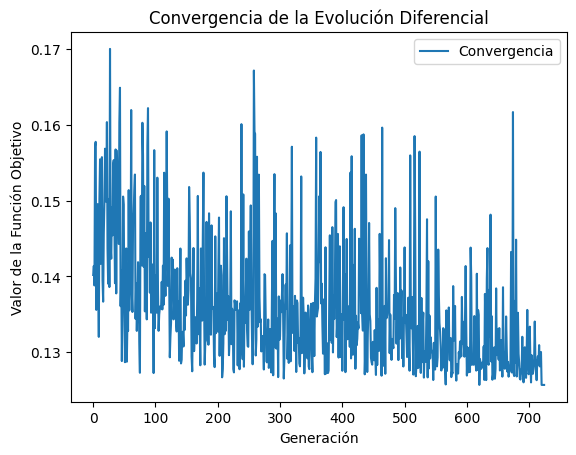

In [65]:
# Graficar la convergencia
generaciones = range(len(historial[str(iteracion)]))
plt.plot(generaciones, historial[str(iteracion)], label='Convergencia')
plt.xlabel('Generación')
plt.ylabel('Valor de la Función Objetivo')
plt.title('Convergencia de la Evolución Diferencial')
plt.legend()
plt.show()

In [42]:
print("Valor: ", 1-min(historial))
print("Indice: ", historial.index(min(historial)))

Valor:  0.8699945410513006
Indice:  623


In [61]:
len(historial['1'])

725

## **Corridas independientes**

In [10]:
import matplotlib.pyplot as plt

# Configuración para la evolución diferencial
limites_parametros = [(20,150),#(1, 100),  # Número de estimadores (n_estimators)
                      (10,40), #(1,30),   # Profundidad máxima del árbol (max_depth)
                      #]
                      (2, 20),   # Mínimo de muestras requeridas para dividir un nodo (min_samples_split)
                      (1, 20)]   # Mínimo de muestras requeridas en cada hoja (min_samples_leaf)

historial = {}  # Para almacenar el valor de la función objetivo en cada generación

# Recopilar resultados de todas las corridas
all_results_fun = []
all_results_x = []

for i in range(33):
    iteracion = str(i + 1)
    historial[iteracion] = []

    # Divide el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    # Ejecuta la evolución diferencial
    resultados_evolution = optimize.differential_evolution(objective_function, limites_parametros,
                                               args=(X_train, y_train, X_test, y_test),
                                               popsize=30, maxiter=1000, tol=0.01, strategy='best1bin')
    all_results_fun.append(resultados_evolution.fun)
    all_results_x.append(resultados_evolution.x)

# Caracterización estadística de los resultados
media_resultados = np.mean(all_results_fun)
std_resultados = np.std(all_results_fun)

In [ ]:
print(all_results_x)

[array([73.65600391,  9.30563948, 16.9214584 ,  4.21094948]), array([42.3013626 ,  9.44776864, 15.31119034, 10.49735964]), array([34.18207382,  8.23153282,  7.2812168 , 10.47514302]), array([80.20362277,  9.22659635, 19.88713809,  5.2620602 ]), array([21.13175138,  8.61701262,  3.91518376, 10.95506122]), array([16.06375503,  8.29564288, 10.26659585, 10.93254473]), array([59.62679173,  8.37476443, 19.08865084,  4.29443767]), array([70.56748867, 10.75196764, 17.32784272,  4.22894828]), array([53.89948175,  9.4078376 ,  9.97828139, 19.78438088]), array([60.97894893, 10.84895534, 15.90114679,  4.99605588]), array([74.47304424,  8.06562093, 19.51165841,  4.41067022]), array([39.34210502,  8.08459233,  6.51815682, 10.59769332]), array([21.52448604,  8.34114204,  4.60970659,  5.13147522]), array([17.84399647,  8.51409554,  4.04688366, 10.79377297]), array([48.71028249, 10.41039041, 18.6766202 , 19.02581892]), array([59.25638068,  9.77753611, 14.71151903,  4.93610938]), array([39.31029299,  8.

## **Histograma de las mejores soluciones**

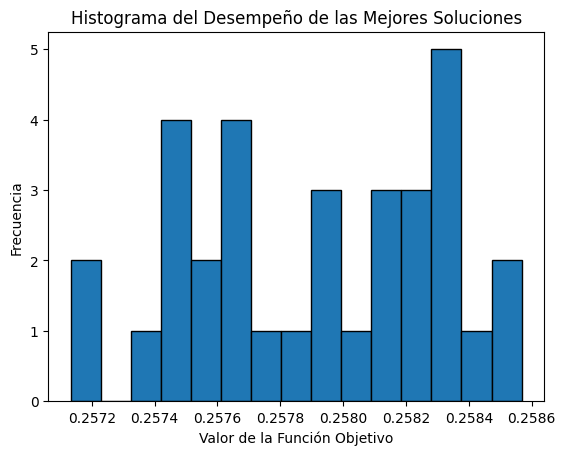

Media de los resultados: 0.2579090741667591
Desviación estándar de los resultados: 0.00039732867305750227


In [ ]:
# Histograma del desempeño de las mejores soluciones encontradas
plt.hist(all_results_fun, bins=15, edgecolor='black')
plt.title('Histograma del Desempeño de las Mejores Soluciones')
plt.xlabel('Valor de la Función Objetivo')
plt.ylabel('Frecuencia')
plt.show()

# Muestra estadísticas resumidas
print("Media de los resultados:", media_resultados)
print("Desviación estándar de los resultados:", std_resultados)


## **Valores minimos de la funcion objetivo para cada iteracion**

Media de los resultados: 0.2579090741667591
Desviación estándar de los resultados: 0.00039732867305750227


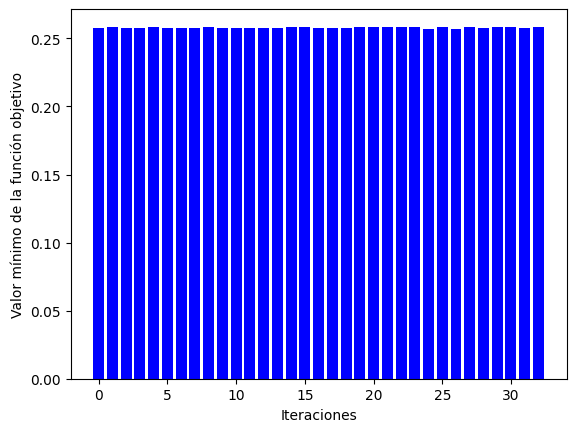

In [ ]:
print("Media de los resultados:", media_resultados)
print("Desviación estándar de los resultados:", std_resultados)

# Crear la gráfica de barras
plt.bar(list(range(len(all_results_fun))) ,all_results_fun, color='blue')

# Personalizar la gráfica
plt.xlabel('Iteraciones')
plt.ylabel('Valor mínimo de la función objetivo')
#plt.title('Gráfica de Barras')

# Mostrar la gráfica
plt.show()

## **Conjunto de valores de las variables de decisión que optimizan la función objetivo**

Promedio del numero de estimadores:  49.98604880417294
Promedio de la Profundidad máxima del árbol:  9.308557206282236
Promedio del Mínimo de muestras requeridas para dividir un nodo:  13.094743296940035
Promedio del Mínimo de muestras requeridas en cada hoja:  8.879594126951668


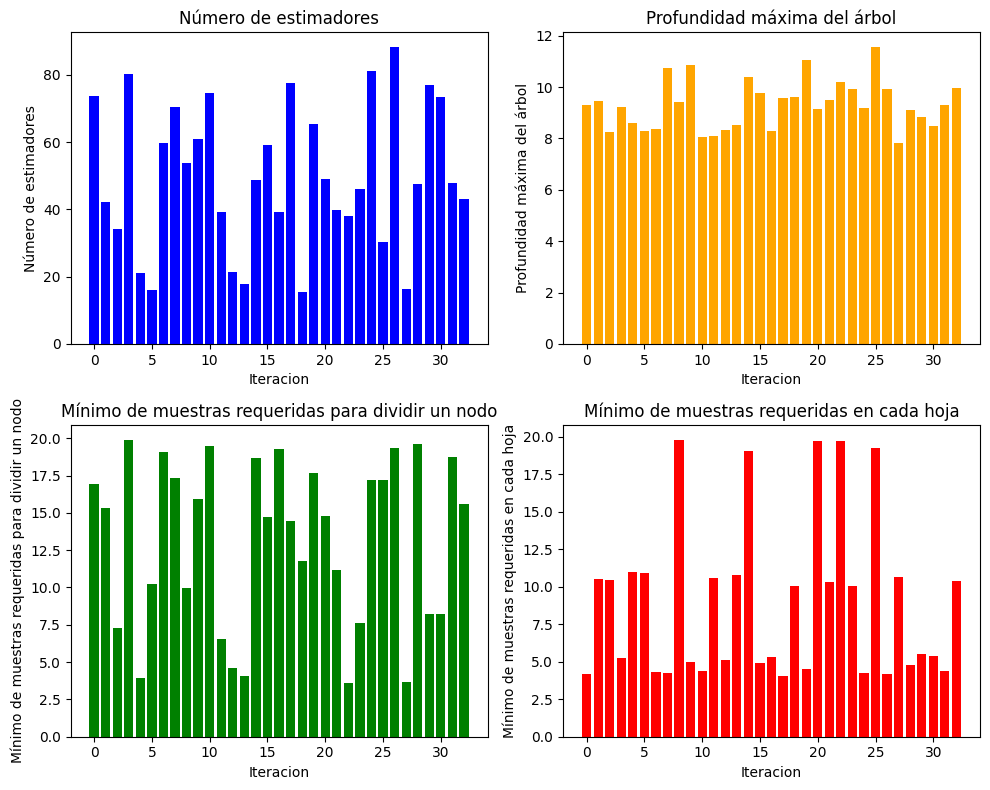

In [ ]:
# Crear una figura y ejes para subgráficas
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

n_estimadores = []
p_maxima = []
min_muestras_nodo = []
min_muestras_hoja = []

valores_eje_x = range(len(all_results_x))

for i in all_results_x:
  n_estimadores.append(i[0])
  p_maxima.append(i[1])
  min_muestras_nodo.append(i[2])
  min_muestras_hoja.append(i[3])


print("Promedio del numero de estimadores: ", np.mean(n_estimadores))
print("Promedio de la Profundidad máxima del árbol: ", np.mean(p_maxima))
print("Promedio del Mínimo de muestras requeridas para dividir un nodo: ", np.mean(min_muestras_nodo))
print("Promedio del Mínimo de muestras requeridas en cada hoja: ", np.mean(min_muestras_hoja))

# Gráfica 1
axs[0, 0].bar(valores_eje_x, n_estimadores, color='blue')
axs[0, 0].set_title('Número de estimadores')
axs[0, 0].set_xlabel('Iteracion')
axs[0, 0].set_ylabel('Número de estimadores')

# Gráfica 2
axs[0, 1].bar(valores_eje_x, p_maxima, color='orange')
axs[0, 1].set_title('Profundidad máxima del árbol')
axs[0, 1].set_xlabel('Iteracion')
axs[0, 1].set_ylabel('Profundidad máxima del árbol')

# Gráfica 3
axs[1, 0].bar(valores_eje_x, min_muestras_nodo, color='green')
axs[1, 0].set_title('Mínimo de muestras requeridas para dividir un nodo')
axs[1, 0].set_xlabel('Iteracion')
axs[1, 0].set_ylabel('Mínimo de muestras requeridas para dividir un nodo')

# Gráfica 4
axs[1, 1].bar(valores_eje_x, min_muestras_hoja, color='red')
axs[1, 1].set_title('Mínimo de muestras requeridas en cada hoja')
axs[1, 1].set_xlabel('Iteracion')
axs[1, 1].set_ylabel('Mínimo de muestras requeridas en cada hoja')

# Ajustar el diseño de las subgráficas
plt.tight_layout()

# Mostrar la figura
plt.show()

In [ ]:
v_min_fo = min(all_results_fun)
index_min = all_results_fun.index(v_min_fo)
parametros_min = all_results_x[index_min]

n_estimadores_min = int(parametros_min[0])
p_maxima_min = int(parametros_min[1])
min_muestras_nodo_min = int(parametros_min[2])
min_muestras_hoja_min = int(parametros_min[3])

print("Valor minimo de la funcion objetivo: ", v_min_fo)
print("Numero de estimadores: ", n_estimadores_min)
print("Profundidad máxima del árbol: ", p_maxima_min)
print("Mínimo de muestras requeridas para dividir un nodo: ", min_muestras_nodo_min)
print("Mínimo de muestras requeridas en cada hoja: ", min_muestras_hoja_min)

Valor minimo de la funcion objetivo:  0.2571328648795557
Numero de estimadores:  88
Profundidad máxima del árbol:  9
Mínimo de muestras requeridas para dividir un nodo:  19
Mínimo de muestras requeridas en cada hoja:  4


RMSE %:  4.730671327766756
R2:  0.5330409835185561


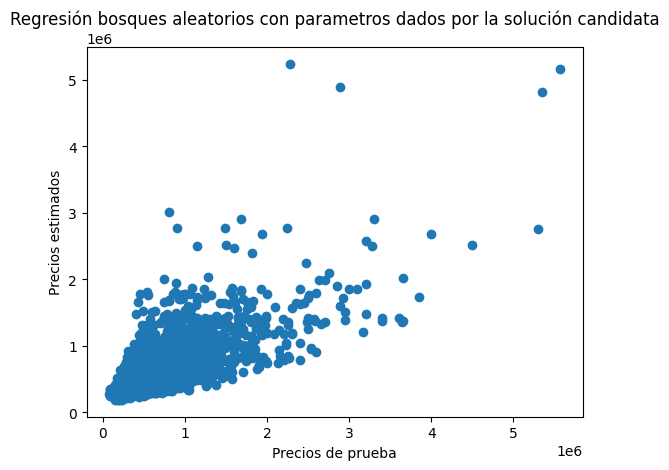

In [ ]:
# Construye el modelo con los parámetros dados por la solución candidata
modelo_rf = RandomForestRegressor(n_estimators=n_estimadores_min,
                                  max_depth=p_maxima_min,
                                  min_samples_split=min_muestras_nodo_min,
                                  min_samples_leaf=min_muestras_hoja_min,
                                  random_state=42)

# Entrena el modelo
modelo_rf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

# Calcular RMSE
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse_percentage = np.sqrt(mse) / np.ptp(y_test)  # Calcular RMSE% en relación con el rango de la variable de respuesta

# Calcular R^2
r2 = r2_score(y_test, y_pred)

plt.title("Regresión bosques aleatorios con parametros dados por la solución candidata")
plt.xlabel("Precios de prueba")
plt.ylabel("Precios estimados")
plt.scatter(y_test, y_pred)

print('RMSE %: ', rmse_percentage*100)
print('R2: ', r2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Definir y entrenar el modelo
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)

# Obtener el árbol de decisión
tree_rules = export_text(model_tree, feature_names=list(X_train.columns))
print(tree_rules)

|--- sqft_living <= 2847.00
|   |--- sqft_living <= 2009.50
|   |   |--- sqft_living <= 1402.50
|   |   |   |--- sqft_living <= 1104.00
|   |   |   |   |--- sqft_living <= 865.00
|   |   |   |   |   |--- sqft_living <= 605.00
|   |   |   |   |   |   |--- sqft_living <= 555.00
|   |   |   |   |   |   |   |--- sqft_living <= 525.00
|   |   |   |   |   |   |   |   |--- sqft_living <= 425.00
|   |   |   |   |   |   |   |   |   |--- sqft_living <= 330.00
|   |   |   |   |   |   |   |   |   |   |--- value: [142000.00]
|   |   |   |   |   |   |   |   |   |--- sqft_living >  330.00
|   |   |   |   |   |   |   |   |   |   |--- bathrooms <= 0.88
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- bathrooms >  0.88
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- sqft_living >  425.00
|   |   |   |   |   |   |   |   |   |--- sqft_living <= 435.00
|   |   |   |   |

In [ ]:
model_tree = DecisionTreeRegressor(max_depth=3)
model_tree.fit(X_train, y_train)
tree_rules = export_text(model_tree, feature_names=list(X_train.columns))
print(tree_rules)

|--- sqft_living <= 2847.00
|   |--- sqft_living <= 2009.50
|   |   |--- sqft_living <= 1402.50
|   |   |   |--- value: [337200.05]
|   |   |--- sqft_living >  1402.50
|   |   |   |--- value: [424529.85]
|   |--- sqft_living >  2009.50
|   |   |--- sqft_living <= 2438.50
|   |   |   |--- value: [522275.71]
|   |   |--- sqft_living >  2438.50
|   |   |   |--- value: [621058.76]
|--- sqft_living >  2847.00
|   |--- sqft_living <= 4062.50
|   |   |--- sqft_living <= 3406.00
|   |   |   |--- value: [773642.69]
|   |   |--- sqft_living >  3406.00
|   |   |   |--- value: [996506.43]
|   |--- sqft_living >  4062.50
|   |   |--- sqft_living <= 6280.00
|   |   |   |--- value: [1432658.53]
|   |   |--- sqft_living >  6280.00
|   |   |   |--- value: [2871750.00]



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Definir y entrenar el modelo
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

importances = model_rf.feature_importances_

feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

top_features = feature_importances.head(10)  # selecciona las 10 características principales

print(top_features)

sqft_living    0.644688
zipcode        0.255809
bathrooms      0.046406
bedrooms       0.030170
floors         0.022927
dtype: float64


In [ ]:
!pip install -U scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=7b22b45e89111b073610c3aa81e94f47f9be882423306be6742a0c5fb8bcd4e1
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


# **OTRO**

## 1

In [46]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=fe6956e304eb43aa9127881058bcaa6b8a017b92d0155564357c0bc8304dc141
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [21]:
# Crear sistema difuso
def create_fuzzy_system(X_train, y_train):
    # Aplicar PCA para reducir dimensionalidad
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train)

    # Generar conjuntos difusos para las características
    bedrooms = fuzz.gaussmf(X_pca[:, 0], np.mean(X_pca[:, 0]), np.std(X_pca[:, 0]))
    sqft_living = fuzz.gaussmf(X_pca[:, 1], np.mean(X_pca[:, 1]), np.std(X_pca[:, 1]))

    # Combinar los conjuntos difusos
    rule1 = np.fmin(bedrooms, sqft_living)

    # Devolver un array bidimensional
    return rule1.reshape(-1, 1) * np.mean(y_train)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
import skfuzzy as fuzz

# Normalizar características
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(x)

# Preparar datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2)

# Inicializar listas para almacenar resultados
validation_errors = []

# Realizar 1000 corridas independientes
for run in range(1000):
    # Crear sistema difuso y obtener salida
    fuzzy_output = create_fuzzy_system(X_train, y_train)

    # Entrenar red neuronal con retropropagación
    model = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000)
    model.fit(X_train, fuzzy_output)

    # Evaluar en conjunto de prueba
    y_pred = model.predict(X_test)
    validation_error = mean_squared_error(y_test, y_pred)
    validation_errors.append(validation_error)

# Graficar error de validación versus epochs
plt.plot(validation_errors)
plt.xlabel('Run')
plt.ylabel('Validation Error')
plt.title('Validation Error vs Run')
plt.show()

# Graficar histograma de errores de validación
plt.hist(validation_errors, bins=30, edgecolor='black')
plt.xlabel('Validation Error')
plt.ylabel('Frequency')
plt.title('Histogram of Validation Errors')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't conv

## 2

In [30]:
!pip install neurokit2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.7 MB/s eta 0:00:00


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

# Normalizar características
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Convertir a tensores de PyTorch
X_tensor = torch.FloatTensor(X_normalized)
y_tensor = torch.FloatTensor(y.values).view(-1, 1)

# Definir función de membresía triangular
def triangular_mf(x, a, b, c):
    return torch.max(torch.min((x - a) / (b - a), (c - x) / (c - b)), torch.zeros_like(x))

# Definir modelo ANFIS
class ANFIS(nn.Module):
    def __init__(self, num_mfs, num_outputs):
        super(ANFIS, self).__init__()
        self.layer1 = nn.Linear(X_tensor.shape[1], num_mfs[0])
        self.layer2 = nn.Linear(num_mfs[0], num_mfs[1])
        self.layer3 = nn.Linear(num_mfs[1], num_outputs)

        self.mf_a = nn.Parameter(torch.rand((num_mfs[0],)))
        self.mf_b = nn.Parameter(torch.rand((num_mfs[0],)))
        self.mf_c = nn.Parameter(torch.rand((num_mfs[0],)))

    def forward(self, x):
        # Calcular las funciones de membresía
        mu_layer1 = triangular_mf(x, self.mf_a, self.mf_b, self.mf_c)
        mu_layer2 = torch.tanh(self.layer1(mu_layer1))
        mu_layer3 = torch.tanh(self.layer2(mu_layer2))

        # Multiplicar por parámetros aprendidos en capa lineal
        x = self.layer3(mu_layer3)

        return x

# Inicializar listas para almacenar resultados
validation_errors = []

# Realizar 1000 corridas independientes
for run in range(1000):
    # Aplicar PCA para reducir dimensionalidad
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_normalized)

    # Configurar modelo ANFIS
    model = ANFIS(num_mfs=[3, 3], num_outputs=1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Entrenar el modelo ANFIS
    for epoch in range(10):
        optimizer.zero_grad()
        outputs = model(X_tensor)
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()

    # Evaluar en conjunto de prueba
    X_test_pca = torch.FloatTensor(pca.transform(X_normalized))
    y_pred = model(X_test_pca).detach().numpy()

    # Calcular error de validación
    validation_error = mean_squared_error(y, y_pred)
    validation_errors.append(validation_error)

# Graficar error de validación versus epochs
plt.plot(validation_errors)
plt.xlabel('Run')
plt.ylabel('Validation Error')
plt.title('Validation Error vs Run')
plt.show()

# Graficar histograma de errores de validación
plt.hist(validation_errors, bins=30, edgecolor='black')
plt.xlabel('Validation Error')
plt.ylabel('Frequency')
plt.title('Histogram of Validation Errors')
plt.show()

RuntimeError: ignored

## 3

In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Separar características (X) y la variable objetivo (y)
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors']]
y = df['price']

# Escalar las características a un rango [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2)#, random_state=42)

# Número de corridas y epochs
num_runs = 1000
num_epochs = 1000

# Listas para almacenar resultados
val_errors = []

# Realizar 1000 corridas independientes
for run in range(num_runs):
    # Inicializar modelo ANFIS
    fis = fuzz.ANFIS(X_train.T, y_train.values, num_rules=5, epochs=num_epochs)

    # Entrenar modelo ANFIS
    fis.train()

    # Evaluar modelo ANFIS en conjunto de validación
    y_val_pred = fis.predict(X_val.T)
    val_error = mean_squared_error(y_val, y_val_pred)
    val_errors.append(val_error)

    # Imprimir progreso cada 100 corridas
    if (run + 1) % 100 == 0:
        print(f"Corrida {run + 1}/{num_runs} completada")

# Graficar error de validación versus epochs para una corrida
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), fis.errors, label='Error de Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error de Entrenamiento a lo largo de las Epochs para una Corrida')
plt.legend()
plt.show()

# Graficar histograma del error de validación
plt.figure(figsize=(10, 6))
plt.hist(val_errors, bins=30, edgecolor='black')
plt.xlabel('Error de Validación')
plt.ylabel('Frecuencia')
plt.title('Histograma del Error de Validación para 1000 Corridas Independientes')
plt.show()

# **Optimización Bayesiana**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from skopt import BayesSearchCV

# Configuración para la evolución diferencial
limites_parametros = [(20,150),#(1, 100),  # Número de estimadores (n_estimators)
                      (10,40), #(1,30),   # Profundidad máxima del árbol (max_depth)
                      #]
                      (2, 20),   # Mínimo de muestras requeridas para dividir un nodo (min_samples_split)
                      (1, 20)]   # Mínimo de muestras requeridas en cada hoja (min_samples_leaf)

# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Realizar la optimización bayesiana
opt = BayesSearchCV(
    objective_function,
    limites_parametros,
    args=(X_train, y_train, X_test, y_test),
    n_iter=30,  # Número de iteraciones (puedes ajustar según el tiempo disponible)
    random_state=42,
    verbose=2
)

# Ejecutar la optimización
opt.fit(X, y)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(opt.best_params_)